# Unsupervised Learning: Creating Customer Segments

> Udacity Machine Learning Engineer Nanodegree: _Project 3_
>
> Author: _Ke Zhang_
>
> Submission Date: _2017-04-30_ (Revision 1)

## Content

- [Getting Started](#Getting-Started)
- [Data Exploration](#Data-Exploration)
- [Data Preprocessing](#Data-Preprocessing)
- [Feature Transformation](#Feature-Transformation)
- [Visualizing a Biplot](#Visualizing-a-Biplot)
- [Conclusion](#Conclusion)
- [References](#References)
- [Reproduction Environment](#Reproduction-Environment)

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

#sklearn makes lots of deprecation warnings...
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Pretty display for notebooks
%matplotlib inline
sns.set(style='white', palette='muted', color_codes=True)
sns.set_context('notebook', font_scale=1.2, rc={'lines.linewidth': 1.2})

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# Select three indices of your choice you wish to sample from the dataset
indices = [370, 181, 183]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,39679,3944,4955,1364,523,2235
1,112151,29627,18148,16745,4948,8550
2,36847,43950,20170,36534,239,47943


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,62892.333333,25840.333333,14424.333333,18214.333333,1903.333333,19576.000000
std,42682.751052,20270.030645,8262.767474,17630.979279,2640.579545,24768.625779
min,36847.000000,3944.000000,4955.000000,1364.000000,239.000000,2235.000000
25%,38263.000000,16785.500000,11551.500000,9054.500000,381.000000,5392.500000
50%,39679.000000,29627.000000,18148.000000,16745.000000,523.000000,8550.000000
75%,75915.000000,36788.500000,19159.000000,26639.500000,2735.500000,28246.500000
max,112151.000000,43950.000000,20170.000000,36534.000000,4948.000000,47943.000000


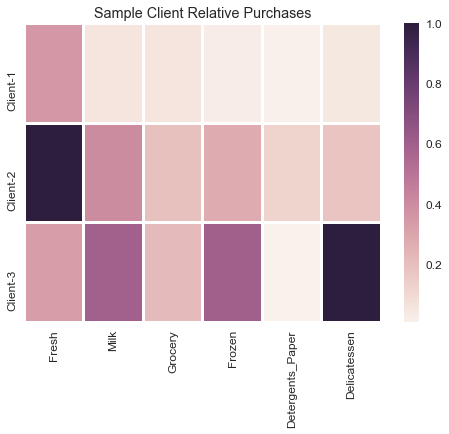

In [4]:
# Display a description of the samples
display(samples.describe())

# Plot heatmap
from sklearn.preprocessing import MinMaxScaler
rel_data = MinMaxScaler().fit_transform(data)
sns.heatmap(
    pd.DataFrame(rel_data[indices], columns = data.keys()),
    yticklabels=['Client-1', 'Client-2', 'Client-3'],
    linewidth=2
) 
sns.plt.title("Sample Client Relative Purchases")

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

* **Customer 1**: The first customer's consumption is primarily based on fresh fruits and vegetables, a small part of frozen products and delicatessen. Since very little grocery items, detergents and washing up liquids were purchased, it resembles less bars or restaurants. By looking at the statistic table it's biggest value the fresh food purchase is abot the 75% of all other customers. So we would profile it as an **small-sized vegetables and fruits supermarket**.

| Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen | 
|-------|------|---------|--------|------------------|--------------|
| 39679 | 3944 | 4955    | 1364   | 523              | 2235         |

* **Customer 2**: The second customer purchased even tremendously more fresh food. It's actually the biggest buyer of fresh food among all customers. As we can see in the heatmap above, compared to the first customer it's spending in other product categories are also considerablely high. We believe this customer represents a big **vegan restaurant chain**. 

| Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen | 
|-------|------|---------|--------|------------------|--------------|
| 112151 | 29627 | 18148 | 16745  | 4948             | 8550         |

* **Customer 3**: The last customer is huge as well. Except in the detergents and papers category it made large purchases in all other categories. In particular it has the greatest consumption in delicatessen which marks it as big **delicatessen catering group**. 

| Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen | 
|-------|------|---------|--------|------------------|--------------|
| 36847 | 43950 | 20170 | 36534  | 239             | 47943         |


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
target_feature = 'Delicatessen'
new_data = data.drop([target_feature], axis=1)

# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(
    new_data,
    data[target_feature],
    test_size=.25,
    random_state=42
)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)


In [6]:
# print top features importances ordered by importance
def rank_features(features, scores, descending=True, n=10):
    """
    sorts and cuts features by scores.
    :return: array of [feature name, score] tuples
    """
    return sorted(
        [[f, s] for f, s in zip(features, scores) if s],
        key=lambda x: x[1],
        reverse=descending
    )[:n]


print("Regressor feature importances: \n{}\n".format(
    rank_features(new_data.columns, regressor.feature_importances_)
))
print("Testing set score for 'Delicatessen': {}".format(score))


Regressor feature importances: 
[['Frozen', 0.43826912060933138], ['Fresh', 0.36222984832960425], ['Milk', 0.09194971108701798], ['Detergents_Paper', 0.086693636504201088], ['Grocery', 0.020857683469845428]]

Testing set score for 'Delicatessen': -2.2547115372


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

We attempted to predict the feature **Delicatessen**. The reported prediction R² score was **-2.25** and negative thus implies that the model failed to fit the data. This indicates that the feature is **necessary** and could not determined from the other categories.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

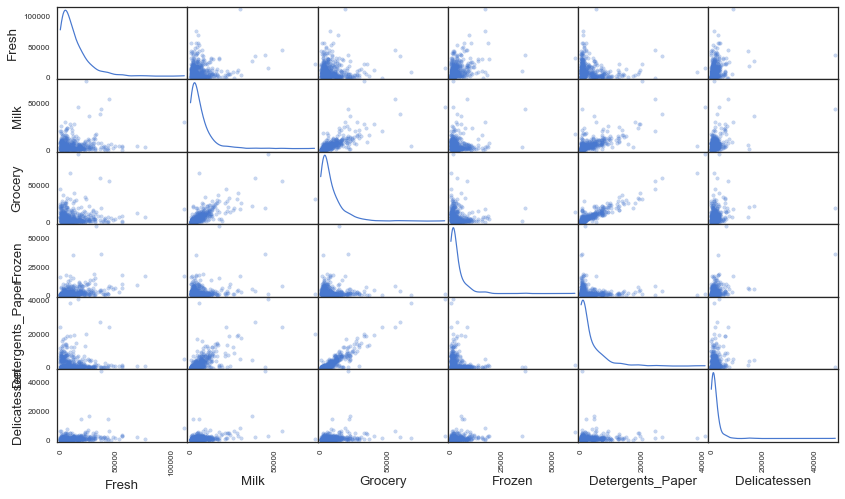

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

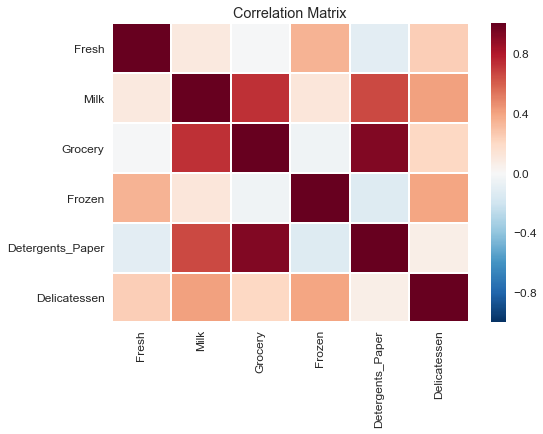

In [8]:
# plot correlation matrix
sns.heatmap(data.corr(),linewidths=1)
sns.plt.title('Correlation Matrix')

In [9]:
# print correlation in numbers
display(data.corr().round(2))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.00,0.10,-0.01,0.35,-0.10,0.24
Milk,0.10,1.00,0.73,0.12,0.66,0.41
Grocery,-0.01,0.73,1.00,-0.04,0.92,0.21
Frozen,0.35,0.12,-0.04,1.00,-0.13,0.39
Detergents_Paper,-0.10,0.66,0.92,-0.13,1.00,0.07
Delicatessen,0.24,0.41,0.21,0.39,0.07,1.00


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The top 3 pairs with strong correlations are: 

|                              | corr |
|------------------------------|------|
| Grocery and Detergents_Paper | .92  |
| Grocery and Milk             | .73  |
| Milk and Detergents_Paper    | .66  |

The others have all a correlation below 0.5 and confirms my suspicion that the selected feature *Delicatessen* is relevant.

The data is not normally distributed. The diagonal of the scatter matrix shows that the features are all right skewed and most of the data points lie on the left side of the plots.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

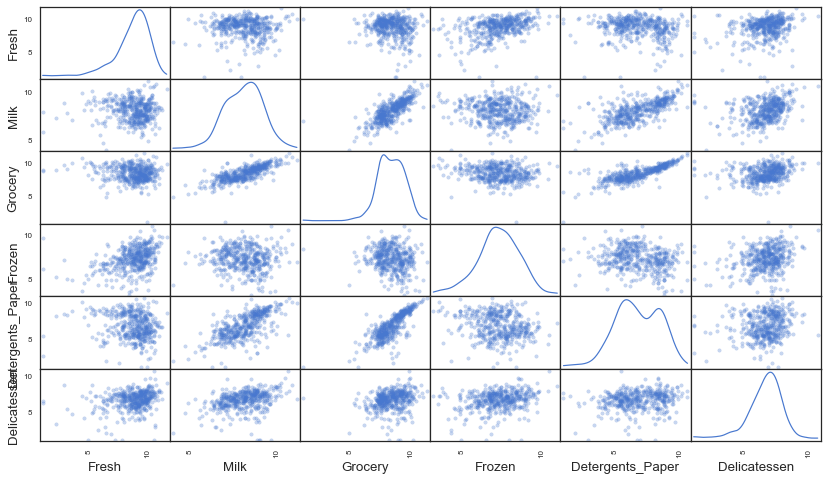

In [10]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.588577,8.279951,8.508152,7.218177,6.259581,7.711997
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768


In [12]:
# print correlation in numbers
# all strong correlations remained strong
display(log_data.corr().round(2))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.00,-0.02,-0.13,0.38,-0.16,0.26
Milk,-0.02,1.00,0.76,-0.06,0.68,0.34
Grocery,-0.13,0.76,1.00,-0.16,0.80,0.24
Frozen,0.38,-0.06,-0.16,1.00,-0.21,0.25
Detergents_Paper,-0.16,0.68,0.80,-0.21,1.00,0.17
Delicatessen,0.26,0.34,0.24,0.25,0.17,1.00


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
from scipy.stats import itemfreq

# For each feature find the data points with extreme high or low values
iqr_filtered_ids = []
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    filtered = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    iqr_filtered_ids.extend(filtered.index.values)
    display(filtered)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [14]:
# Select the indices for data points you wish to remove
filtered_freq = itemfreq(iqr_filtered_ids)
print('Data points outside IQR: {}\n{}'.format(
    len(filtered_freq),
    filtered_freq
))

# Remove records filtered by at least 2 IQR filters
outliers = [x[0] for x in filtered_freq if x[1] >= 3]
print('Data points with more than three outliers: {}'.format(
    outliers
))
display(data.iloc[outliers])


# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
# print new data
good_data.describe()

Data points outside IQR: 42
[[ 38   1]
 [ 57   1]
 [ 65   2]
 [ 66   2]
 [ 75   2]
 [ 81   1]
 [ 86   1]
 [ 95   1]
 [ 96   1]
 [ 98   1]
 [109   1]
 [128   2]
 [137   1]
 [142   1]
 [145   1]
 [154   3]
 [161   1]
 [171   1]
 [175   1]
 [183   1]
 [184   1]
 [187   1]
 [193   1]
 [203   1]
 [218   1]
 [233   1]
 [264   1]
 [285   1]
 [289   1]
 [304   1]
 [305   1]
 [325   1]
 [338   1]
 [343   1]
 [353   1]
 [355   1]
 [356   1]
 [357   1]
 [412   1]
 [420   1]
 [429   1]
 [439   1]]
Data points with more than three outliers: [154]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
154,622,55,137,75,7,8


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,8.735778,8.130418,8.449190,7.308193,6.796997,6.675579
std,1.477678,1.064564,1.104677,1.278059,1.707357,1.293863
min,1.098612,4.718499,1.098612,3.218876,1.098612,1.098612
25%,8.054040,7.344998,7.676010,6.612041,5.560615,6.016154
50%,9.051696,8.198089,8.467372,7.336286,6.709304,6.874198
75%,9.737108,8.881349,9.274768,8.177371,8.277644,7.507415
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

In the dataset there are **42** data points having values outside of the IQR filter in one of the features. Five of them have outliers in more than one features.

Outliers should be removed from the dataset when they could harm the correctness of the learning algorithms which are prone to outliers. In our case we decided to remove only the data points with extreme values extreme values in more than one features. They are [**65, 66, 75, 128, 154**]. As we looked at the other data points manually, each of them are actually reasonable and makes valid interpretations. Furthermore as we have only 440 data points in total, removing 42 of them (~10%) could have negative distoring effects on the prediction results.

No additional data points were added to the *outliers list*.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

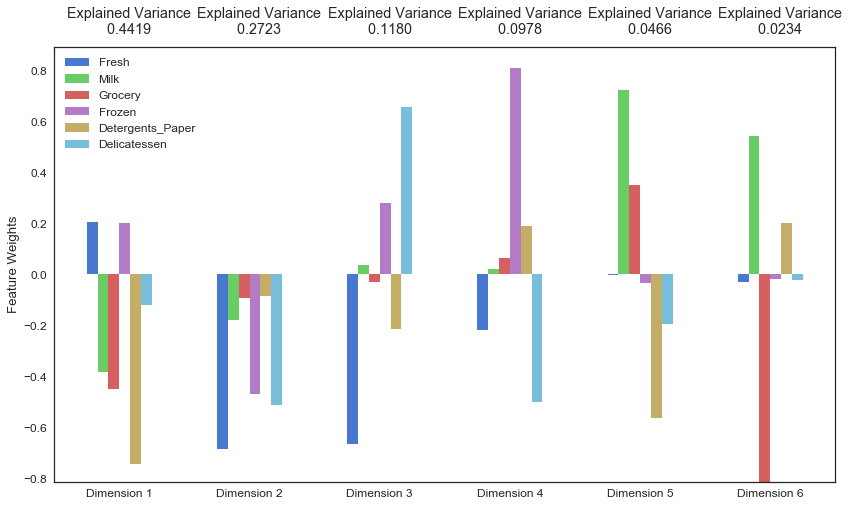

In [15]:
# Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [16]:
print('Variance expained by the first 2 PCs: {}'.format(
    pca_results['Explained Variance'].round(2).cumsum()[1]
))
print('Variance expained by the first 4 PCs: {}'.format(
    pca_results['Explained Variance'].round(2).cumsum()[3]
))
display(pca_results[:4].round(2))

Variance expained by the first 2 PCs: 0.71
Variance expained by the first 4 PCs: 0.93


,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.44,0.21,-0.38,-0.45,0.20,-0.74,-0.12
Dimension 2,0.27,-0.68,-0.18,-0.09,-0.47,-0.08,-0.51
Dimension 3,0.12,-0.66,0.04,-0.03,0.28,-0.21,0.66
Dimension 4,0.10,-0.22,0.02,0.07,0.81,0.19,-0.50


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**


In total **.71** of the variance is expained by the first and second principal component and **.92** by the first four principal components.

The visualization above shows the customer spending patterns divided in six dimensions. Each dimension is identified by the high positive or negative features weights of the different categories.

* Dimension 1: The first principal component makes up about 44% of the spending patterns and is mainly constitued by *Fresh* and *Frozen* items. Customers within this spending pattern purchase far below average on goods in *Detergents_Paper*, *Grocery* and *Milk* and buy more *Fresh* and *Frozen* goods compared to average.
    * e.g. vegan supermarkets

| Explained Variance | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen |
|--|--|--|--|--|--|--|
| 0.44 | 0.21 | -0.38 | -0.45 | 0.20 | -0.74 | -0.12 |

* Dimension 2: The second principal component makes up about 27% of the spending patterns and is highly negatively correlated with *Fresh*, *Frozen* and *Milk*. This group has less than average consumption in all categories, especially in the early mentioned three categories the consumption is far below average.
    * e.g. coffee shops

| Explained Variance | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen |
|--|--|--|--|--|--|--|
| 0.27 | -0.68 | -0.18 | -0.09 | -0.47 | -0.08 | -0.51 |

* Dimension 3: The third dimension is charaterized by very high spending in *Delicatessen* and considerably high spending in *Frozen* items and very low spending in *Fresh* and considerably low spending in *Detergents_Paper* items.
    * e.g. delicatessen shops

| Explained Variance | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen |
|--|--|--|--|--|--|--|
| 0.12 | -0.66 | 0.04 | -0.03 | 0.28 | -0.21 | 0.66 |

* Dimension 4: The consumption on *Frozen* goods stands out from all the other categories. Customers represented by this dimension spend far less on *Fresh* or *Delicatessen* categories.
    * e.g. gelaterias or frozen food shops

| Explained Variance | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen |
|--|--|--|--|--|--|--|
| 0.10               | -0.22 | 0.02 | 0.07 | 0.81 | 0.19 | -0.50 |


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.5547,-1.7441,-0.4563,-1.0932,0.2325,-0.1513
1,-1.9144,-4.9951,-0.0118,0.5977,0.5371,0.2415
2,-0.1399,-5.3097,2.7407,0.0424,2.2051,-0.2629


Interpretations:
* Customer 1 -> Dimension 1: vegan supermarket (guess: organic supermarket)
* Customer 2 -> Dimension 4: gelateria or frozen food shop (guess organic restaurant)
* Customer 3 -> Dimension 3: delicatessen shop (guess: delicatessen catering)


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [18]:
from sklearn.decomposition import PCA
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

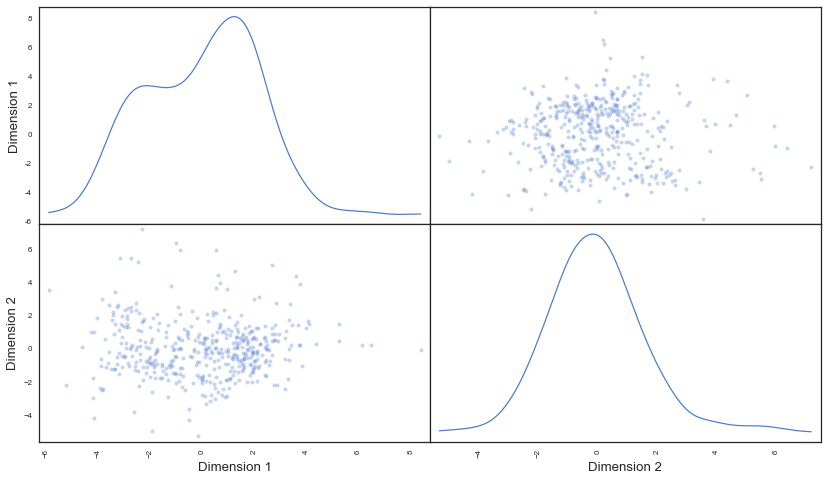

In [19]:
# plot scatter mattrix of the 2 dimensions
pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [20]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.5547,-1.7441
1,-1.9144,-4.9951
2,-0.1399,-5.3097


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4419,0.2062,-0.3836,-0.4497,0.2019,-0.7435,-0.1205
Dimension 2,0.2723,-0.6839,-0.1803,-0.0931,-0.4693,-0.0846,-0.5134


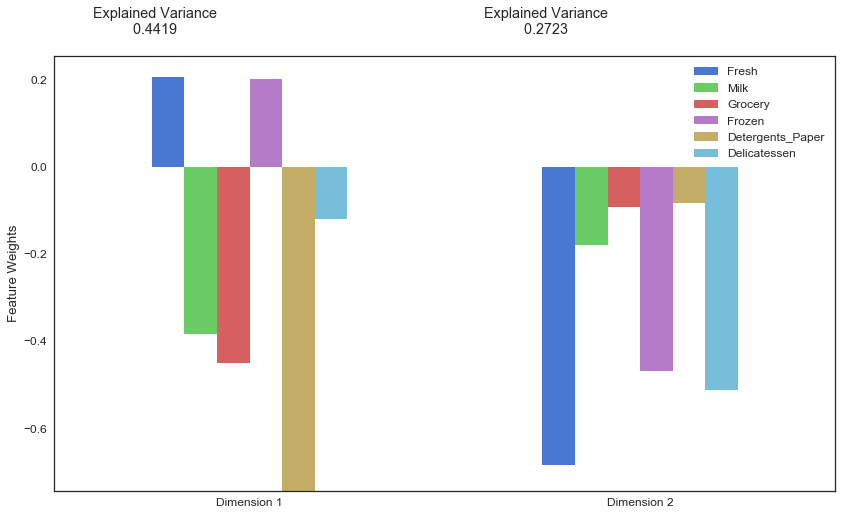

In [21]:
vs.pca_results(reduced_data, pca, keys=good_data.keys())

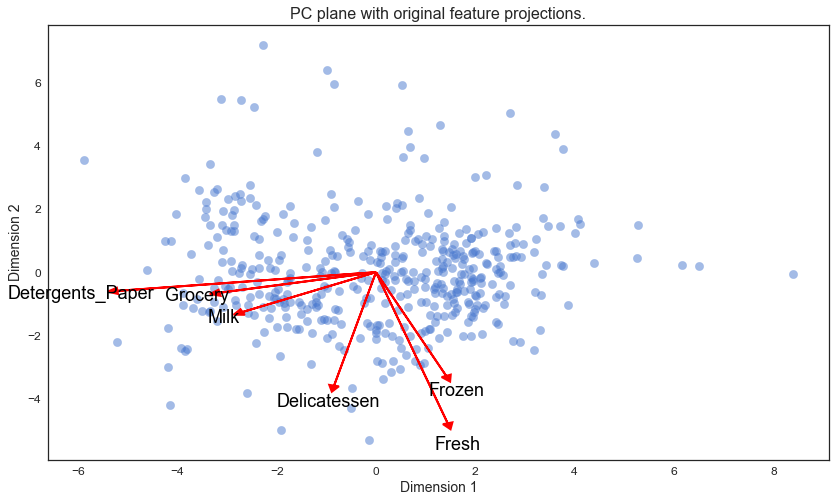

In [22]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

* Most strongly correlated with the first component:
    * Detergents_Paper
    * Grocery
    * Milk
* Most strongly correlated with the second component
    * Fresh
    * Frozen
    * Delicatessen
* These observations agree with the first two dimensions in the *pca_results* plot obtained earlier. 

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

| Clustering Algorithm   | Advantages | Disadvantages |
|------------------------|------------|---------------|
| K-Means                | <ul><li>faster running time</li><li>tighter clusters, especially if cluster are globular</li><li>guaranteed to converge to a local minimum</li><li>better for high dimensional data</li><li>easy to interpreset and implement</li></ul>| <ul><li>difficult to predict k</li><li>different initial partitions can result in different final clusters</li><li>assumes spherical clusters and does not work well with clusters of different sizes or densities</li><li>hard assignment might lead to misgrouping</li></ul>|
| Gaussian Mixture Model (GMM) |  <ul><li>not biased on cluster size or structure as does by K-Means (circular)</li><li>supports soft clustering</li><li>works well with non-linear geometric distributions (more flexible in terms of cluster covariance structure of the data as well as the centers of the latent Gaussians, e.g. rotated and/or elongated distribution of points in a cluster)</li></ul>|<ul><li>high dimensionality could cause initialization difficulties</li><li>requires sufficient data points in clusters to converge</li><li>difficult to interpret</li></ul>|

Based on our observations so far, we prefer to use the **GMM algorithm** since it is unclear what structure exists in the data. The *GMM* algorithm is more flexible than the *K-Means* algorithm, performs soft clustering and handles non-spherical clusters. Moreover, there's no obsiously problems with high dimensionality after running the dimensionality reduction with *PCA*.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def calculate_gaussian_mixture(n):
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n, random_state=42)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    return (clusterer, centers, preds, sample_preds, score)

In [24]:
for n in range(2, 11):
    _, _, _, _, score = calculate_gaussian_mixture(n)
    print('# clusters={0}, silhouette score={1:.3f}'.format(
        n,
        score
    ))

# clusters=2, silhouette score=0.412
# clusters=3, silhouette score=0.409
# clusters=4, silhouette score=0.288
# clusters=5, silhouette score=0.186
# clusters=6, silhouette score=0.322
# clusters=7, silhouette score=0.276
# clusters=8, silhouette score=0.348
# clusters=9, silhouette score=0.339
# clusters=10, silhouette score=0.322


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

Silhouette score is at highest with 2 clusters.

| # Clusters | Silhouette Score |
|------------|------------------|
| **2** | **.412** |
| 3 | .409 |
| 4 | .288 |
| 5 | .186 |
| 6 | .322 |
| 7 | .276 |
| 8 | .348 |
| 9 | .339 |
| 10 | .322 |

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

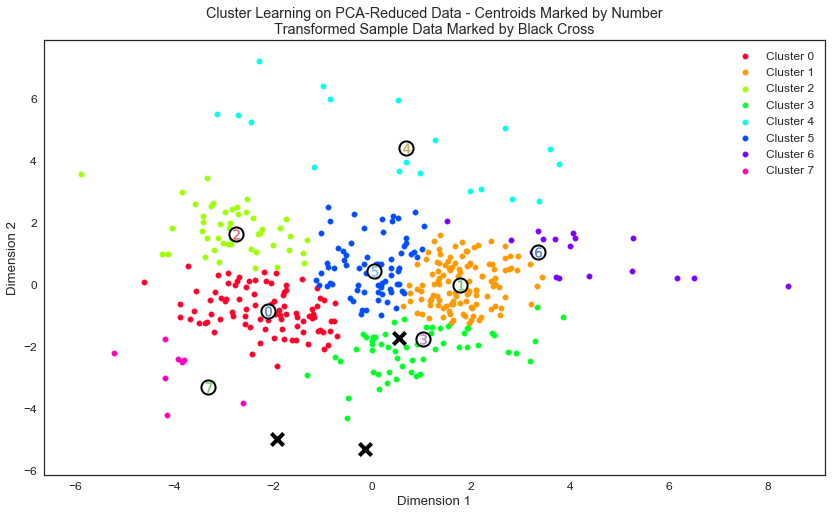

In [25]:
# Display the results of 8 clusters
clusterer, centers, preds, _, _ = calculate_gaussian_mixture(8)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

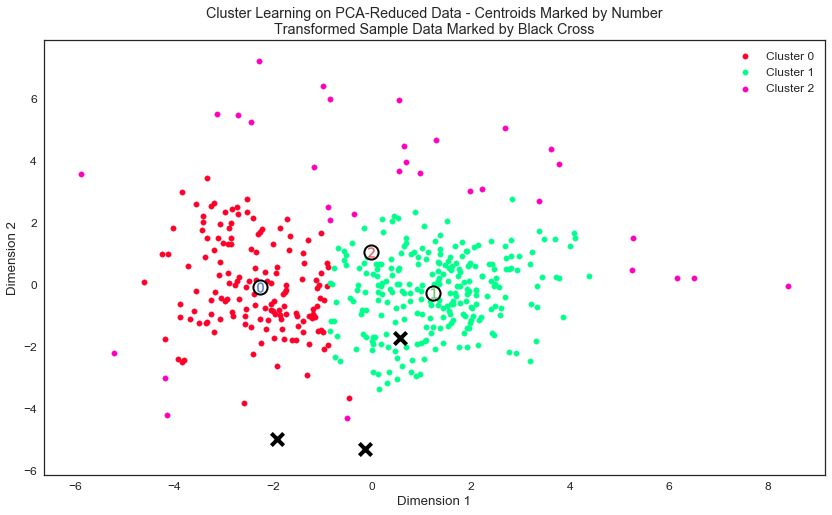

In [26]:
# Display the results of 3 clusters
clusterer, centers, preds, _, _ = calculate_gaussian_mixture(3)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

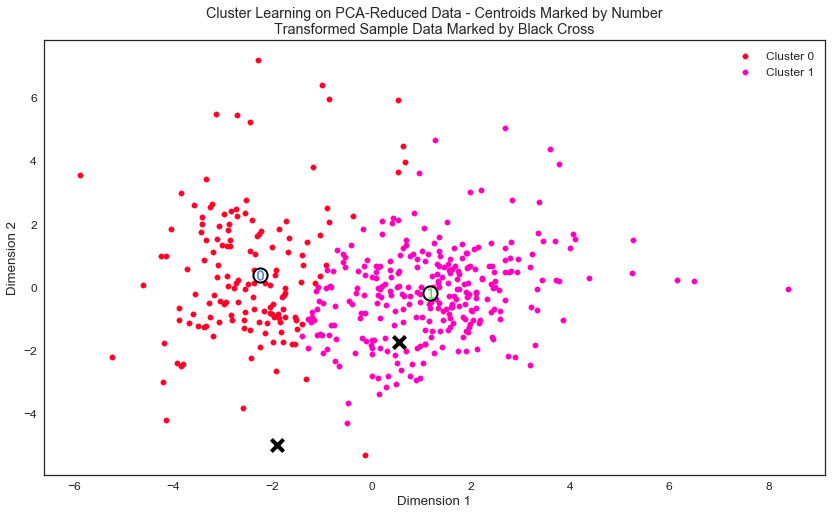

In [27]:
# Display the results of 2 clusters (final)
clusterer, centers, preds, sample_preds, _ = calculate_gaussian_mixture(2)
vs.cluster_results(reduced_data, preds, centers, pca_samples[:2])

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [28]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3025.0,7483.0,12336.0,795.0,4577.0,854.0
Segment 1,9092.0,2241.0,2803.0,2079.0,379.0,762.0


In [29]:
# show descriptive statistics of data with outliers removed
data.drop(data.index[outliers]).describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,12026.216401,5809.343964,7969.077449,3078.758542,2888.041002,1528.325740
std,12650.053925,7383.691519,9506.658748,4858.097200,4771.313128,2822.390808
min,3.000000,112.000000,3.000000,25.000000,3.000000,3.000000
25%,3146.500000,1548.500000,2156.000000,744.000000,260.000000,410.000000
50%,8533.000000,3634.000000,4757.000000,1535.000000,820.000000,967.000000
75%,16934.500000,7196.500000,10665.500000,3559.500000,3935.000000,1821.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

* **Segment 0**: Customers in the first segment are in the cluster with large purchase in *Detergents_Paper*, *Milk* and *Grocery* products. All spendings in these three categories exceed the 75% quantiles. This segment could be **restaurants or coffee shops**.
* **Segment 1**: In this segment customers have higher consumption in *Fresh* and *Frozen* products. The spendings were less striking with center points between the 50% and 75% quantiles. This spending behaviour could represent **vegetables or frozen food markets**.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [30]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

* **Sample Point 0**: The first sample point is placed in **cluster 1**. With a very high *Fresh* value it's much closer to the center of the **segment 1** (vegetables or frozen food market). The prediction is consistent with the segmentation.

| Cluster | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen | 
|---|-------|------|---------|--------|------------------|--------------|
| 1 | 39679 | 3944 | 4955    | 1364   | 523              | 2235         |

* **Sample Point 1**: This sample point is predicted to be in the **cluster 0**. By looking at *cluster_results* plot we can see that this point lies between the two segments. It has the characteristics of both segments: a very high *Fresh* and *Detergents_Paper* on one side, but also very high values of *Milk*, *Grocery* and *Frozen* on the other side. Our guess in Question 1 was that this customer could be an vegan restaurant and this would more likely be described by **segment 0** (restaurants or coffee shops). So we would say that the prediction is consistent with segmentation.

| Cluster  | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen | 
|---|-------|------|---------|--------|------------------|--------------|
| 0 | 112151 | 29627 | 18148 | 16745  | 4948             | 8550         |

* **Sample Point 2**: The last sample point is predicted to be in **cluster 0**. It has large values in all categories except in *Detergents_Paper* which indicates that it belongs to the **segment 0** (restaurants or coffee shops). Again the prediction is correct and consistent with the segmentation. 

| Cluster | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen | 
|---|-------|------|---------|--------|------------------|--------------|
| 0 | 36847 | 43950 | 20170 | 36534  | 239             | 47943         |


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** The wholesale distributor should perform separate tests in each of the customer segments because the change in the delivery schedule may affect the segments differently. 

Intuitively we would assume a different behavior between the two customer segments. *Fresh* fruits and *Frozen* food or *Detergents_Paper* have definitely different expiry dates which implies different level of effects on the customer segments.

We would conduct two separate experiments each with one of the segments. We'll choose the invariant and evaluation metrics, estimate the proper sizing and durations and setup the control and treatment groups. After the test period we can then check which group of customer it affected the most by comparing the the effect sizes and significances.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Once trained the GMM algorithm can utilize the estimated product spending data of the new customers to predict their customer segments. And from the conducted A/B testing we know which delivery service is appropriate for which customer segment and can make the our decisions on that basis.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

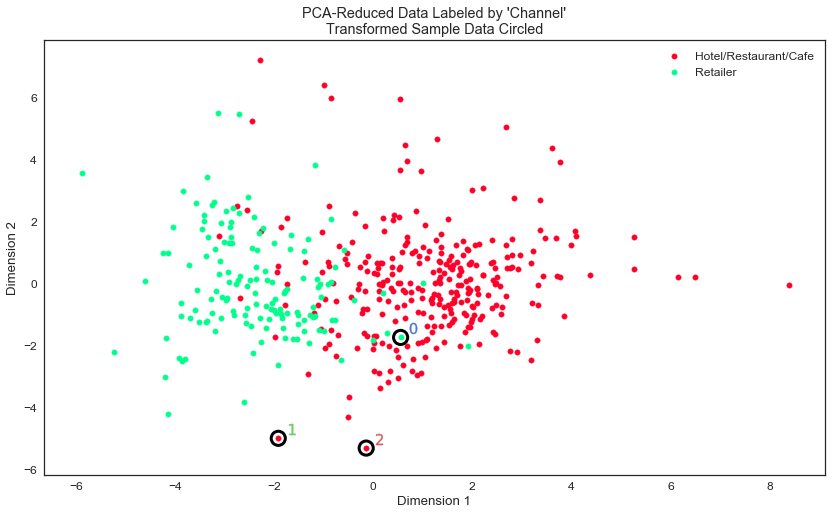

In [31]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

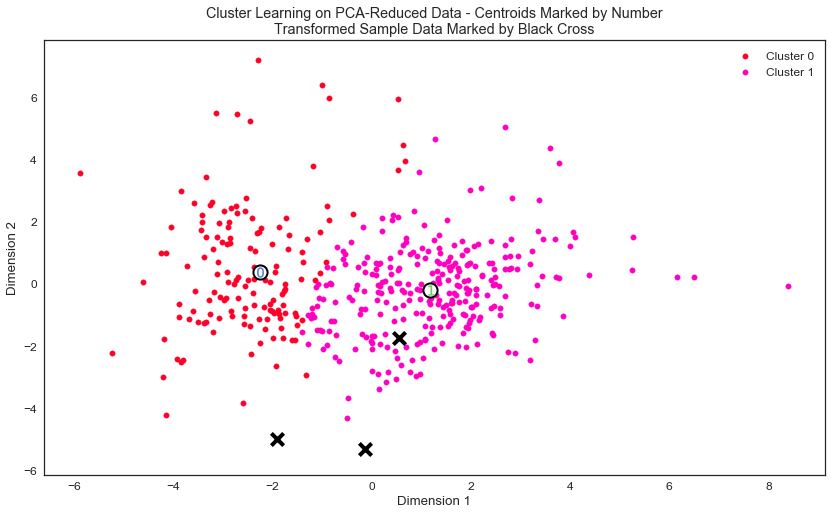

In [32]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

Our analysis produced the same number of clusteres. What's more, the customer segments predicted by the GMM clustering algorithm match with the underlying distributions of *Hotel/Restaurant/Cafe* and *Retailer* for the most part as we can see in the last two cluster results. 

However we failed to label the customer segments previously. The first customer segment what we marked as *resturants or coffee shops* is actually **Retailer**. And the second should be **Hotel/Restaurant/Cafe** but was **supermarkets**. Last but not least it's really a coincidence that our sample points were correctly labeled. The first sample was a *Retailer* but lies in the middle of *Hotel/Restuarant/Cafe* cluster. And the other two samples were inbetween of the two clusters and were assigned to the wrong cluster by the GMM algorithm.



## References

* [Scikit-Learn - DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
* [Udacity - Machine Learning](https://classroom.udacity.com/courses/ud262)

## Reproduction Environment

In [33]:
import IPython
print IPython.sys_info()

{'commit_hash': u'5c9c918',
 'commit_source': 'installation',
 'default_encoding': 'cp936',
 'ipython_path': 'C:\\dev\\anaconda\\lib\\site-packages\\IPython',
 'ipython_version': '5.1.0',
 'os_name': 'nt',
 'platform': 'Windows-7-6.1.7601-SP1',
 'sys_executable': 'C:\\dev\\anaconda\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '2.7.13 |Anaconda custom (32-bit)| (default, Dec 19 2016, 13:36:02) [MSC v.1500 32 bit (Intel)]'}


In [34]:
!pip freeze

alabaster==0.7.9
anaconda-client==1.6.0
anaconda-navigator==1.4.3
argcomplete==1.0.0
astroid==1.4.9
astropy==1.3
Babel==2.3.4
backports-abc==0.5
backports.shutil-get-terminal-size==1.0.0
backports.ssl-match-hostname==3.4.0.2
beautifulsoup4==4.5.3
bitarray==0.8.1
blaze==0.10.1
bokeh==0.12.4
boto==2.45.0
Bottleneck==1.2.0
cdecimal==2.3
cffi==1.9.1
chardet==2.3.0
chest==0.2.3
click==6.7
cloudpickle==0.2.2
clyent==1.2.2
colorama==0.3.7
comtypes==1.1.2
conda==4.3.16
configobj==5.0.6
configparser==3.5.0
contextlib2==0.5.4
cookies==2.2.1
cryptography==1.7.1
cycler==0.10.0
Cython==0.25.2
cytoolz==0.8.2
dask==0.13.0
datashape==0.5.4
decorator==4.0.11
dill==0.2.5
docutils==0.13.1
enum34==1.1.6
et-xmlfile==1.0.1
fastcache==1.0.2
Flask==0.12
Flask-Cors==3.0.2
funcsigs==1.0.2
functools32==3.2.3.post2
futures==3.0.5
gevent==1.2.1
glueviz==0.9.1
greenlet==0.4.11
grin==1.2.1
h5py==2.6.0
HeapDict==1.0.0
idna==2.2
imagesize==0.7.1
ipaddress==1.0.18
ipykernel==4.5.2
ipython==5.1.0
ipython-genutils==0.1.0